## Inference : Special Moves of SFII 

---
### Import Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

---
### Load data(deserialize)

In [3]:
# Load data (deserialize)
with open('movesSF2.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)


# Spliting into training, dev and test set using indexing
dataset_x = unserialized_data['dataset_x']
dataset_y = unserialized_data['dataset_y']
name_classes = {y: x for x, y in unserialized_data['name_classes'].items()}
num_classes = np.unique(dataset_y).shape[0]
indexes = np.arange(dataset_x.shape[0])
np.random.shuffle(indexes)
train_index = indexes[: int(0.9 * dataset_x.shape[0])]
test_index  = indexes[int(0.9 * dataset_x.shape[0]) :]
train_x = dataset_x[train_index]
train_y = dataset_y[train_index]
test_x  = dataset_x[test_index]
test_y  = dataset_y[test_index]

---
### Categorical

In [4]:
# convert class vectors to binary class matrices
train_y = keras.utils.to_categorical(train_y, num_classes)
test_y  = keras.utils.to_categorical(test_y,  num_classes)
print(train_y.shape)
print(test_y.shape)

(2392, 10, 4)
(266, 10, 4)


---
### Model load and Evaluate

In [5]:
model = tf.keras.models.load_model('movesSF2.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, 10, 54, 54, 64)    154624    
_________________________________________________________________
batch_normalization (BatchNo (None, 10, 54, 54, 64)    256       
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 10, 27, 27, 64)    0         
_________________________________________________________________
conv_lst_m2d_1 (ConvLSTM2D)  (None, 10, 25, 25, 128)   885248    
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 25, 25, 128)   512       
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 10, 12, 12, 128)   0         
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, 10, 10, 10, 64)    4

In [6]:
test_loss, test_acc = model.evaluate(test_x,  test_y, batch_size=4, verbose=2)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

67/67 - 15s - loss: 2.0377e-04 - acc: 1.0000
Test loss: 0.00020376991597004235
Test accuracy: 1.0


---
### Predict

In [7]:
def showResult(result):
    # Displaying random choice of dataset
    plt.figure(figsize = (10,2))
    for i in range(test_x.shape[1]):
        img = test_x[choice][i]
        plt.subplot(1,test_x.shape[1],i+1)
        plt.gca().set_title(name_classes[np.argmax(test_y[choice][i])][:10])
        plt.imshow(img, aspect='auto')
    plt.tight_layout()
    plt.show()

CPU times: total: 1.02 s
Wall time: 1 s


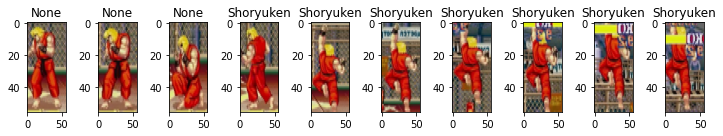

In [8]:
choice = np.random.choice(test_x.shape[0])
%time result = model.predict(np.expand_dims(test_x[choice], axis=0))
showResult(result)

In [9]:
np.set_printoptions(suppress=True)
print("test_y :\t", np.argmax(test_y[choice], axis=1))
print("predict :\t", np.argmax(result.squeeze(), axis=1))
print(result)

test_y :	 [0 0 0 2 2 2 2 2 2 2]
predict :	 [0 0 0 2 2 2 2 2 2 2]
[[[0.9999933  0.00000665 0.         0.        ]
  [0.9999999  0.00000017 0.         0.        ]
  [0.9999919  0.00000753 0.0000006  0.        ]
  [0.01287396 0.00000009 0.98706585 0.00006005]
  [0.00001882 0.         0.99998105 0.00000008]
  [0.00002665 0.         0.9999733  0.00000001]
  [0.00010579 0.         0.9998938  0.00000034]
  [0.00009091 0.         0.99990857 0.00000049]
  [0.00026471 0.         0.99972767 0.00000768]
  [0.0001677  0.         0.999828   0.00000435]]]
